In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial
import os

# Mine
from wilson_cowan_2d.simulations import concrete_wc_kernel as wck
from wilson_cowan_2d.simulations import wc_params as wcp
from wilson_cowan_2d.simulations.nonlinear_functions import decreasing_exponential
from wilson_cowan_2d.analysis.nulclines import calc_cross_points, calc_nulclines_crosspoints

%load_ext autoreload
%autoreload 2

In [2]:
report_path = "/home/nicolasjudd/school_notes/neural/progress_report/"
img_path = os.path.join(report_path, 'img')

[[0.005      0.083      0.424     ]
 [0.00394725 0.00396604 0.20470882]]


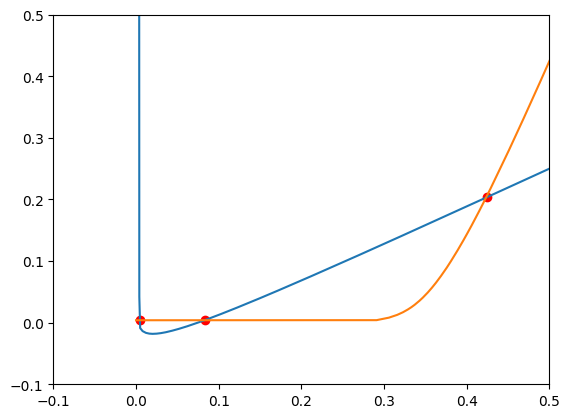

In [174]:
τ = 0.7
τe = 1
τi = τ * τe

σ = 0.8
σe = 1
σi = σ* σe

param = wcp.DefaultParams(τ = np.array([τe, τi]), η = 1, size = 2**4, σ=np.array([σe,σi]))
# param.Θ = np.array([0.08, 0.4])

u,v,cps = calc_nulclines_crosspoints(param)
_ = plt.plot(*u)
_ = plt.plot(*v)
_ = plt.scatter(*cps, c='r')
_ = plt.xlim(-0.1, 0.5)
_ = plt.ylim(-0.1, 0.5)
print(cps)

u_str = cps[0,-1]
v_str = cps[1,-1]

u_str = 0
v_str = 0

u = u_str*np.ones((param.size, param.size))
u[param.size//2-2:param.size//2+2, param.size//2-2:param.size//2+2] = 1
v = v_str*np.ones((param.size, param.size))

#  inp = (u3, v3, u3, 0)

inp = (u, v)

The solver successfully reached the end of the integration interval.


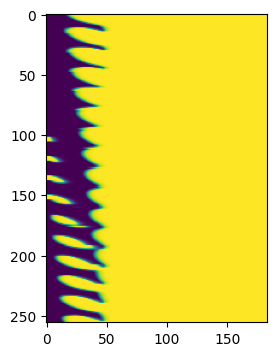

In [181]:
end = 300
step = end/(param.size)
# res = wck.WCDecExpTravelNonLocal2D(inp, param)((0, end), t_eval=np.arange(0, end, step))
res = wck.WCDecExpTravelNonLocal2D(inp, param)((0, end))

print(res._solved.message)


fig = plt.figure(figsize=(16,4))
_ = plt.imshow(res.u.T, vmin=0, vmax=1)


In [189]:
test = res.u.ravel().reshape(len(res), 2**4, 2**4)

In [190]:
gen = iter(range(len(res)))

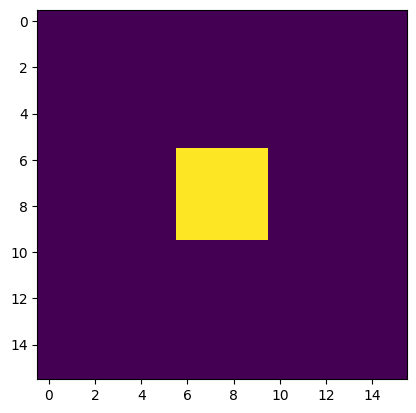

In [191]:
ix = next(gen)
plt.imshow(test[ix], vmin=0, vmax=0.5)

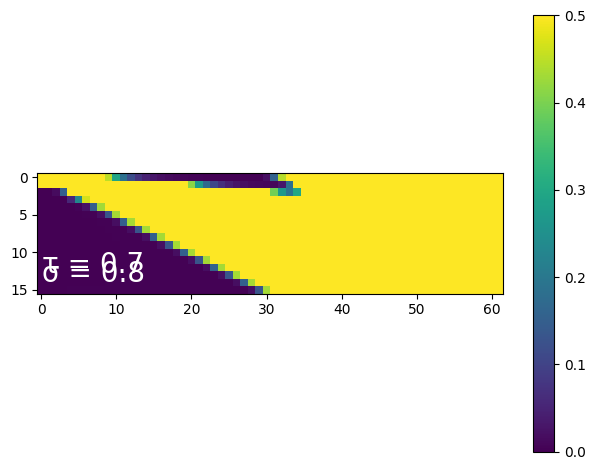

In [42]:
fig = plt.figure()
ax = plt.gca()
plt.imshow(res.u[:,:param.size].T, aspect='equal', vmin=0, vmax=0.5)
plt.colorbar()

fig_name = f"nonlocal_wave_sig={σ}_tau={τ}.png"
plt.text(0.01, 0.05, f"σ = {σ}",fontsize=20, color='white', ha='left', va='bottom', transform=ax.transAxes)
plt.text(0.01, 0.125, f"τ = {τ}",fontsize=20, color='white', ha='left', va='bottom', transform=ax.transAxes)
fig.tight_layout()
# plt.savefig(os.path.join(img_path, fig_name), bbox_inches='tight')

In [37]:
res._solved.t

array([0])

In [38]:
res._solved.y.reshape(2, param.size, param.size)

array([[[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0

In [19]:
_ = plt.plot(res.t, res.u[:, 300])

IndexError: index 300 is out of bounds for axis 1 with size 256